In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools import create_silence_recordings, split_train_validation
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display
import tensorflow as tf

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

from WavDataGenerator import WavDataGenerator
from WavDataLoader import WavDataLoader
from WavDataGeneratorV2 import WavDataGeneratorV2


from os.path import join as path_join
from os import mkdir
from os.path import isdir, basename
import glob

In [3]:
data_dir = r'C:\Development\kaggle\tensorflow-speech-recognition-challenge\data\train\audio'

noise_folder = path_join(data_dir, '_background_noise_')
silence_folder = path_join(data_dir, 'silence')


In [17]:
example_file = r"C:\Development\kaggle\tensorflow-speech-recognition-challenge\data\train\audio\yes\00f0204f_nohash_0.wav"

In [18]:
yy, _ = librosa.load(example_file, sr=16000)

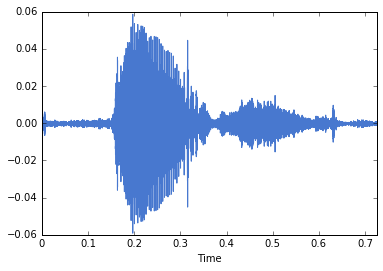

In [22]:
librosa.display.waveplot(yy)

In [23]:
ms = librosa.feature.melspectrogram(y=yy, sr=16000, n_mels=128, fmax=8000, hop_length=512)
ms = librosa.core.logamplitude(ms)

In [39]:
ms2 = librosa.util.normalize(ms, axis=0)

In [40]:
np.var(ms2)

0.033148465352929174

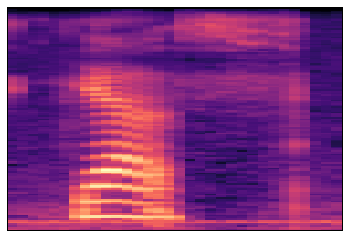

In [41]:
librosa.display.specshow(ms2, sr=16000)

In [42]:
ms2

array([[-0.40715297, -0.43246366, -0.47959335, ..., -0.4249132 ,
        -0.47865587, -0.51267291],
       [-0.44950135, -0.44515591, -0.44879035, ..., -0.43679764,
        -0.41557561, -0.43354434],
       [-0.56827194, -0.49212024, -0.46534902, ..., -0.53503899,
        -0.53401555, -0.47468921],
       ..., 
       [-0.92028092, -0.91976784, -0.90776529, ..., -0.95090623,
        -0.96533179, -0.90226008],
       [-0.93131757, -0.97354594, -0.99449658, ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [6]:
if not isdir(silence_folder):
    create_silence_recordings(glob.glob(path_join(noise_folder, '*.wav')), 
                              silence_folder, stride=3000)

In [4]:
labels = ['silence', 'yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

In [8]:
dg = WavDataGeneratorV2(data_dir, labels, nx=128, ny=32)

In [17]:
dataset = tf.data.Dataset.from_generator(dg.generator, 
                                         output_types=(tf.float32, tf.float32), 
                                         output_shapes=(
                                                        tf.TensorShape([dg.nx, dg.ny]),  
                                                        tf.TensorShape([dg.num_labels])
                                                       )
                                         )

In [18]:
NUM_THREADS = 5
dataset = dataset.map(lambda x,y : (x,y), num_parallel_calls=NUM_THREADS).prefetch(buffer_size=256)
dataset = dataset.batch(batch_size=4)
X, y = dataset.make_one_shot_iterator().get_next()

In [23]:
with tf.Session() as sess:
    batch_data, batch_labels = sess.run([X, y])

In [ ]:
wdl = WavDataLoader(data_dir,labels)
